# EDA- Shay Eyal & Maor Blumberg

## `Note`:

- In this notebook we'll analyze chosen variables from the dataset. We'll plot the **distribution** of the variables with respect to the target variable (Is_click), with an accompanying **statistical test** to check the effect size and significance of the relationship.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import pandas as pd

ctr = pd.read_csv(r"C:\Users\maorb\CSVs\train_dataset_EDA.csv")
ctr.head(10)

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,98528.0,2017-07-04 16:42,7716.0,C,405490.0,60305.0,3.0,NaN,3.0,Male,3.0,3.0,NaN,1.0,1.0
1,589714.0,2017-07-07 07:40,1035283.0,I,118601.0,28529.0,4.0,82527.0,10.0,Female,4.0,3.0,3.0,1.0,0.0
2,478652.0,2017-07-07 20:42,65994.0,H,359520.0,13787.0,4.0,NaN,4.0,Male,4.0,3.0,2.0,0.0,0.0
3,34536.0,2017-07-05 15:05,75976.0,H,405490.0,60305.0,3.0,NaN,3.0,Male,3.0,3.0,3.0,0.0,0.0
4,71863.0,2017-07-06 20:11,987498.0,C,405490.0,60305.0,3.0,NaN,2.0,Male,2.0,3.0,2.0,0.0,0.0
5,255052.0,2017-07-04 21:40,519554.0,I,396664.0,51181.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
6,226591.0,2017-07-07 09:43,1123277.0,D,105960.0,11085.0,5.0,NaN,5.0,Male,5.0,3.0,2.0,0.0,0.0
7,184142.0,2017-07-06 16:26,768870.0,C,359520.0,13787.0,4.0,NaN,4.0,Male,4.0,3.0,2.0,0.0,0.0
8,378014.0,2017-07-03 05:21,53849.0,D,359520.0,13787.0,4.0,NaN,3.0,Male,3.0,3.0,2.0,1.0,0.0
9,480758.0,2017-07-07 12:30,586553.0,H,359520.0,13787.0,5.0,NaN,4.0,Male,4.0,3.0,NaN,1.0,0.0


In [32]:
ctr.sort_values(by='DateTime', inplace=True)

In [34]:
ctr.groupby('user_id').size().sort_values(ascending=False)

user_id
658554.0    216
297960.0    179
983136.0    167
422201.0    126
18434.0     123
           ... 
480628.0      1
480625.0      1
480615.0      1
480593.0      1
536597.0      1
Length: 133893, dtype: int64

In [13]:
# Convert to datetime if needed
ctr['DateTime'] = pd.to_datetime(ctr['DateTime'])
ctr['date'] = ctr['DateTime'].dt.date # Extract date from timestamp

In [14]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389163 entries, 0 to 389162
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   session_id              384997 non-null  float64       
 1   DateTime                385054 non-null  datetime64[ns]
 2   user_id                 385055 non-null  float64       
 3   product                 384989 non-null  object        
 4   campaign_id             384975 non-null  float64       
 5   webpage_id              385006 non-null  float64       
 6   product_category_1      384962 non-null  float64       
 7   product_category_2      80928 non-null   float64       
 8   user_group_id           369844 non-null  float64       
 9   gender                  369839 non-null  object        
 10  age_level               369854 non-null  float64       
 11  user_depth              369841 non-null  float64       
 12  city_development_index  281026

In [6]:
ctr.isna().sum()

session_id                  4166
DateTime                    4109
user_id                     4108
product                     4174
campaign_id                 4188
webpage_id                  4157
product_category_1          4201
product_category_2        308235
user_group_id              19319
gender                     19324
age_level                  19309
user_depth                 19322
city_development_index    108137
var_1                       4161
is_click                    4132
dtype: int64

In [24]:
ctr['product_category_1'] = pd.Categorical(ctr['product_category_1'])
cat_cols = ['product_category_1', 'is_click', 'product_category_2', 'product','gender','var_1']
ctr[cat_cols]

,product_category_1,is_click,product_category_2,product,gender,var_1
0,3.0,1.0,NaN,C,Male,1.0
1,4.0,0.0,82527.0,I,Female,1.0
2,4.0,0.0,NaN,H,Male,0.0
3,3.0,0.0,NaN,H,Male,0.0
4,3.0,0.0,NaN,C,Male,0.0
...,...,...,...,...,...,...
389158,3.0,0.0,NaN,I,Male,1.0
389159,3.0,0.0,NaN,H,Male,1.0
389160,4.0,0.0,82527.0,I,Male,1.0
389161,1.0,0.0,NaN,I,Male,0.0


<Axes: xlabel='city_development_index', ylabel='Count'>

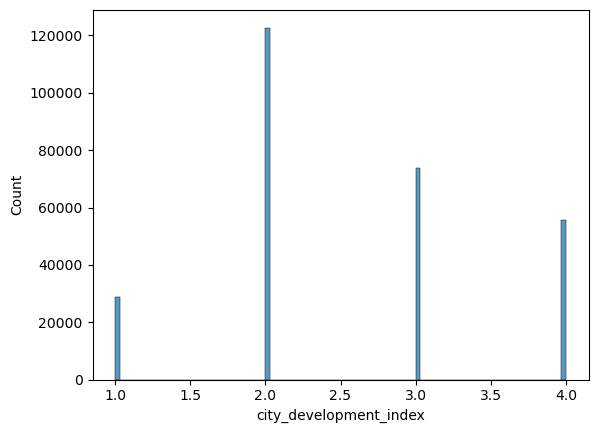

In [22]:
sns.histplot(ctr['city_development_index'])

In [30]:
ctr[ctr['session_id'].isna()]['user_depth'].value_counts()

user_depth
3.0    1205
2.0     100
1.0      34
Name: count, dtype: int64

In [32]:
ctr[ctr['product'].isna()]

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,date
244,NaN,2017-07-03 17:21:00,1019586.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2017-07-03
358,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaT
425,NaN,2017-07-07 05:13:00,7515.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2017-07-07
487,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaT
495,226595.0,2017-07-07 13:57:00,NaN,NaN,NaN,11085.0,5.0,NaN,NaN,Male,4.0,3.0,NaN,NaN,NaN,2017-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388692,532398.0,2017-07-04 21:16:00,NaN,NaN,98970.0,6970.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2017-07-04
388761,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaT
388987,125432.0,NaT,NaN,NaN,359520.0,NaN,NaN,NaN,NaN,Male,NaN,1.0,NaN,1.0,0.0,NaT
389058,NaN,NaT,NaN,NaN,414149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


# Note

### **How do user attributes correlate with click events?**

Explore the relationship between demographic features (gender, age_level, city_development_index, user_group_id) and the likelihood of clicking.
Investigate whether certain user segments (e.g., age groups or genders) exhibit higher CTR.


## Gender

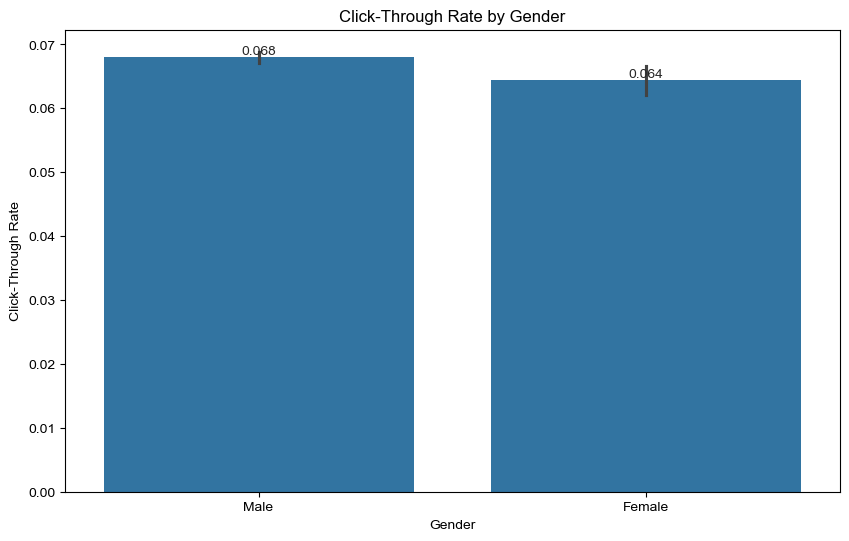

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.barplot(x='gender',y='is_click',data=ctr)
sns.set_style('whitegrid')
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.title('Click-Through Rate by Gender')  # Add the title
plt.xlabel('Gender')
plt.ylabel('Click-Through Rate')
plt.show() # this line displays the plot

### Chi-Square Test

In [5]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(ctr['gender'], ctr['is_click'])   
chi2, p, dof, expected = chi2_contingency(contingency_table)
phi_coefficient = np.sqrt(chi2 / len(ctr))
print(f'Chi2: {chi2}')
print(f'p-value: {p}')
print(f'Phi Coefficient: {phi_coefficient}')
print(f'Degree of Freedom: {dof}')

Chi2: 7.78679661528444
p-value: 0.005262942778005183
Phi Coefficient: 0.004473151880723977
Degree of Freedom: 1


**We can see that the effect of gender on CTR (i.e. Phi coefficient) is negligible. Meaning, we don't have enough evidence that gender has a notable impact on CTR.**

***

## Age level

## 

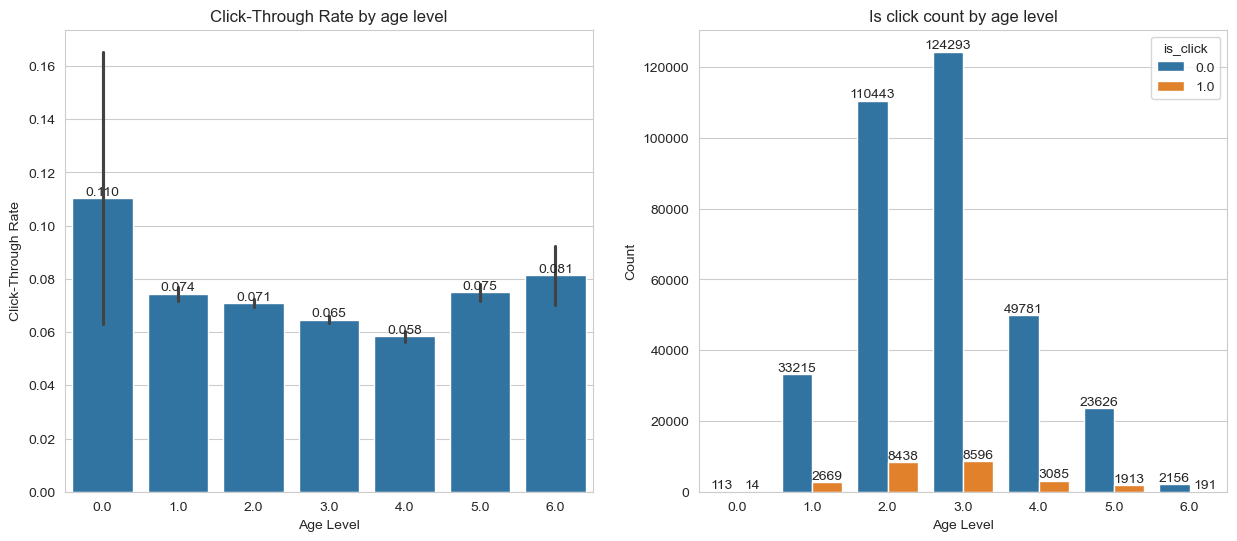

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='age_level', y='is_click', data=ctr, ax=ax[0])
ax[0].bar_label(ax[0].containers[0], fmt='%.3f')
ax[0].set_title('Click-Through Rate by age level')  # Add the title
ax[0].set_xlabel('Age Level')
ax[0].set_ylabel('Click-Through Rate')

sns.countplot(x='age_level', hue='is_click', data=ctr, ax=ax[1])
for container in ax[1].containers:
	ax[1].bar_label(container)
ax[1].set_title('Is click count by age level')  # Add the title
ax[1].set_xlabel('Age Level')
ax[1].set_ylabel('Count')

plt.show() # this line displays the plot


### ANOVA Test

In [16]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data_clean_di = ctr.dropna(subset=['is_click', 'age_level']).copy()

data_clean_di['age_level'] = data_clean_di['age_level'].astype(int) # Turn age_level into int first for turning it into a category
data_clean_di['age_level'] = data_clean_di['age_level'].astype('category') # Turn age_level into category
model = ols('is_click ~ age_level', data=data_clean_di).fit() # Fit the anova model
anova_table = anova_lm(model)

# Extract values for Partial Eta-Squared
ss_effect = anova_table.loc['age_level', 'sum_sq']
ss_total = ss_effect + anova_table.loc['Residual', 'sum_sq']
partial_eta_squared = ss_effect / ss_total

# Calculate Cohen's f²
cohens_f_squared = partial_eta_squared / (1 - partial_eta_squared)

# Display results
print("ANOVA Table:")
print(anova_table)
print("\nPartial Eta-Squared:", partial_eta_squared)
print("Cohen's f²:", cohens_f_squared)

ANOVA Table:
                 df        sum_sq   mean_sq          F        PR(>F)
age_level       6.0     10.692218  1.782036  28.292401  5.166278e-34
Residual   368526.0  23212.123818  0.062986        NaN           NaN

Partial Eta-Squared: 0.0004604186652065412
Cohen's f²: 0.00046063074820078086


**Our effect size is really small so we can't say that we have enough evidence to say that the CTR is different between different age levels.**

**Note: the high CTR is for age level 0 in which we have low number of samples.**

***

In [4]:
ctr['gender'].value_counts()

gender
Male      326805
Female     43034
Name: count, dtype: int64

In [6]:
ctr.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,98528.0,2017-07-04 16:42,7716.0,C,405490.0,60305.0,3.0,NaN,3.0,Male,3.0,3.0,NaN,1.0,1.0
1,589714.0,2017-07-07 07:40,1035283.0,I,118601.0,28529.0,4.0,82527.0,10.0,Female,4.0,3.0,3.0,1.0,0.0
2,478652.0,2017-07-07 20:42,65994.0,H,359520.0,13787.0,4.0,NaN,4.0,Male,4.0,3.0,2.0,0.0,0.0
3,34536.0,2017-07-05 15:05,75976.0,H,405490.0,60305.0,3.0,NaN,3.0,Male,3.0,3.0,3.0,0.0,0.0
4,71863.0,2017-07-06 20:11,987498.0,C,405490.0,60305.0,3.0,NaN,2.0,Male,2.0,3.0,2.0,0.0,0.0


## Age level & Gender vs CTR

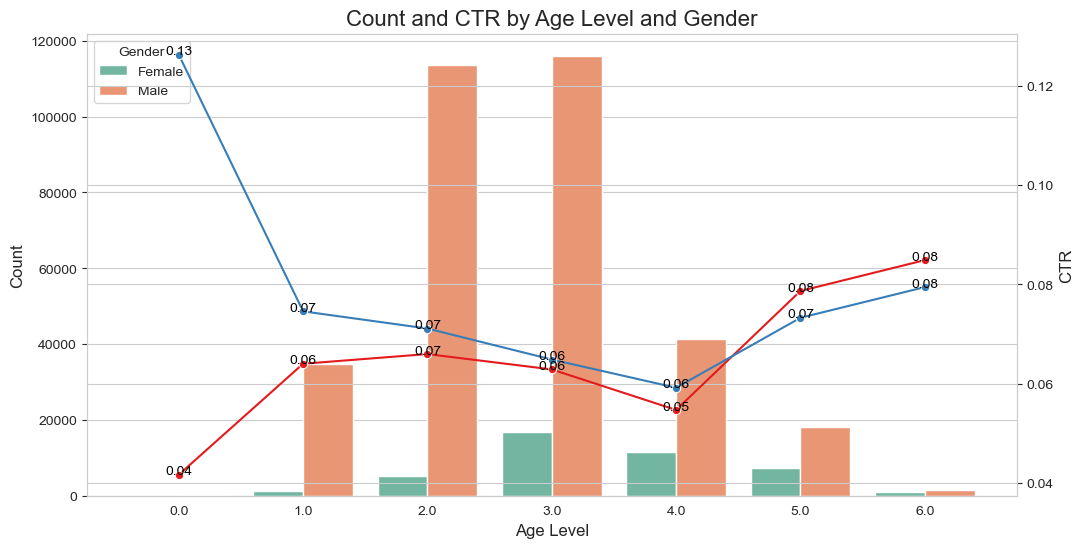

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Calculate counts and CTR
grouped = ctr.groupby(['age_level', 'gender']).agg(
    count=('is_click', 'size'),  # Total count
    clicks=('is_click', 'sum')  # Total clicks
).reset_index()

grouped['ctr'] = grouped['clicks'] / grouped['count']  # Calculate CTR

# Set up the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Countplot for count distribution
sns.barplot(
    x='age_level', y='count', hue='gender', data=grouped, ax=ax1, palette='Set2'
)

# Add CTR as a line plot on a secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(
    x='age_level', y='ctr', hue='gender', data=grouped, marker='o', ax=ax2, legend=False, palette='Set1'
)

# Add labels for CTR points
for i, row in grouped.iterrows():
    ax2.text(row['age_level'], row['ctr'], f"{row['ctr']:.2f}", color='black', ha='center')

# Titles and labels
ax1.set_title('Count and CTR by Age Level and Gender', fontsize=16)
ax1.set_xlabel('Age Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax2.set_ylabel('CTR', fontsize=12)

# Adjust legend
ax1.legend(title='Gender', loc='upper left')
plt.show()


## Gender and User depth vs Clicks

CTR by User Depth and Gender:
   gender  user_depth       CTR
0  Female         1.0  0.071138
1  Female         2.0  0.062535
2  Female         3.0  0.064324
3    Male         1.0  0.073360
4    Male         2.0  0.064158


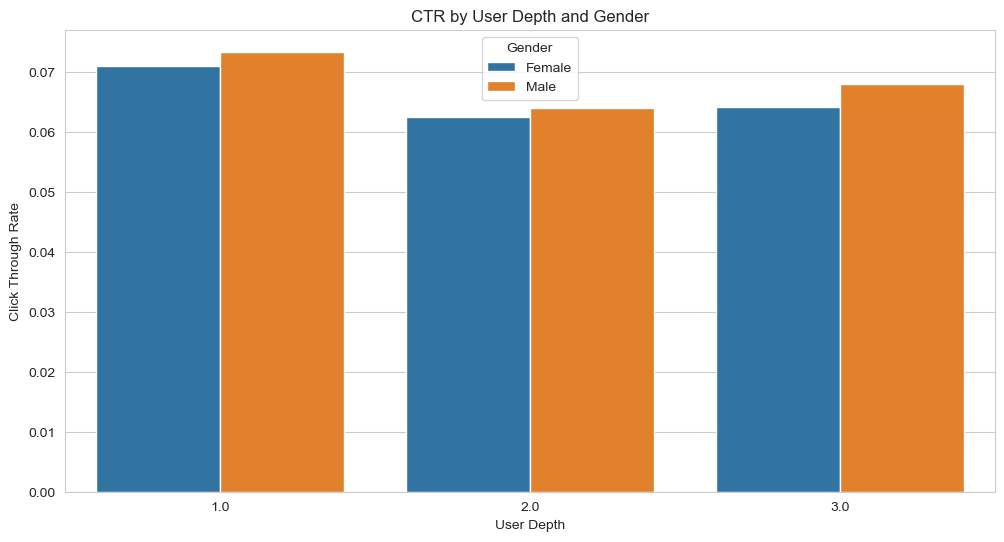

In [17]:
# Demographic Table: CTR by User Attributes
user_attributes = ctr[['gender', 'user_depth', 'is_click']]
ctr_by_attributes = user_attributes.groupby(['gender', 'user_depth']).agg(CTR=('is_click', 'mean')).reset_index()

# Display the table
print("CTR by User Depth and Gender:")
print(ctr_by_attributes.head())

# Visualize CTR by User Group
plt.figure(figsize=(12, 6))
sns.barplot(x='user_depth', y='CTR', hue='gender', data=ctr_by_attributes)
plt.title('CTR by User Depth and Gender')
plt.xlabel('User Depth')
plt.ylabel('Click Through Rate')
plt.legend(title='Gender')
plt.show()

### Anova Test with Interaction

In [24]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Clean and preprocess the data
data_clean_di = ctr.dropna(subset=['is_click', 'user_depth', 'gender']).copy()
data_clean_di['user_depth'] = data_clean_di['user_depth'].astype(int).astype('category')

# Define and fit the ANOVA model
model = ols('is_click ~ gender * user_depth', data=data_clean_di).fit()
anova_table = anova_lm(model)

# Extract values for Partial Eta-Squared
ss_gender = anova_table.loc['gender', 'sum_sq']
ss_user_depth = anova_table.loc['user_depth', 'sum_sq']
ss_effect = ss_gender + ss_user_depth  # Combine sum of squares for all predictors
ss_total = ss_effect + anova_table.loc['Residual', 'sum_sq']
partial_eta_squared = ss_effect / ss_total

# Calculate Cohen's f²
cohens_f_squared = partial_eta_squared / (1 - partial_eta_squared)

# Display results
print("ANOVA Table:")
print(anova_table)
print("\nPartial Eta-Squared:", partial_eta_squared)
print("Cohen's f²:", cohens_f_squared)


ANOVA Table:
                         df        sum_sq   mean_sq         F    PR(>F)
gender                  1.0      0.489788  0.489788  7.772176  0.005306
user_depth              2.0      0.628363  0.314182  4.985573  0.006836
gender:user_depth       2.0      0.015865  0.007932  0.125875  0.881725
Residual           367838.0  23180.482332  0.063018       NaN       NaN

Partial Eta-Squared: 4.823445558682995e-05
Cohen's f²: 4.823678226176161e-05


**First of all the effect is low, moreover it seems that there's no evidence for interaction between gender and user depth with respect to CTR.**

***

## Gender and Group ID vs Clicks

CTR by User Demographic Attributes:
   gender  user_group_id       CTR
0  Female            0.0  0.041667
1  Female            7.0  0.064167
2  Female            8.0  0.065723
3  Female            9.0  0.063048
4  Female           10.0  0.054871


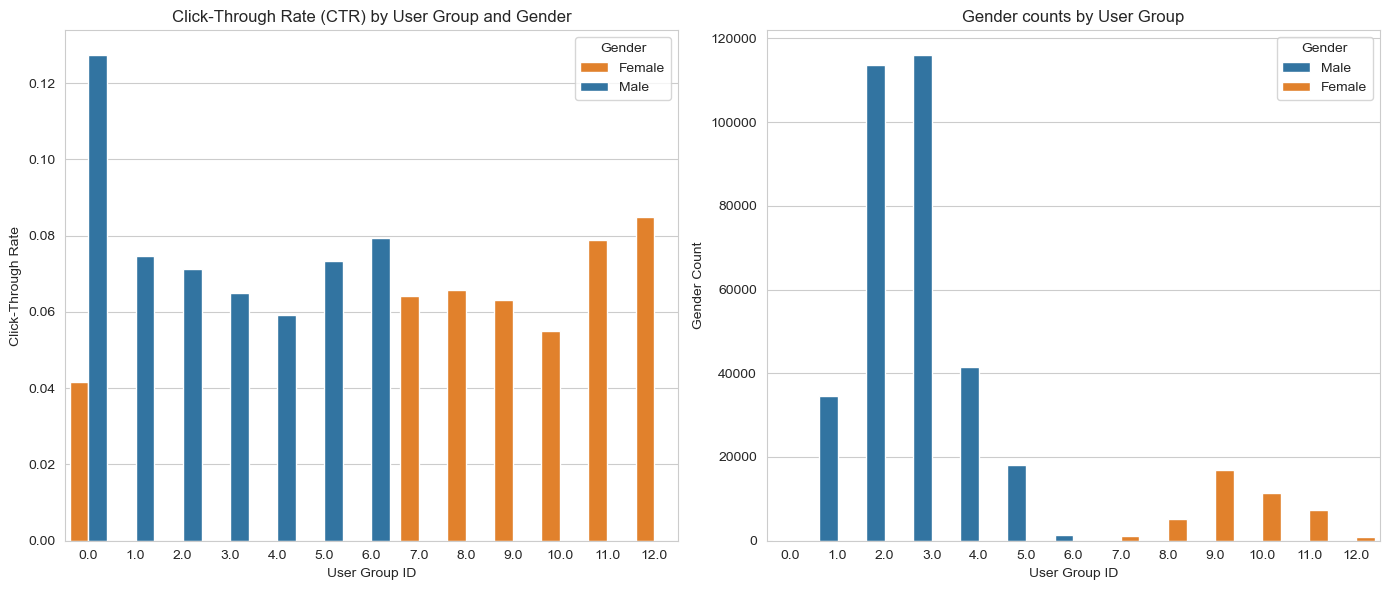

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a consistent color palette for gender
palette = {'Male': '#1f77b4', 'Female': '#ff7f0e'}  # Example: blue for male, orange for female

# Group data by demographic attributes
user_attributes = ctr[['gender', 'user_group_id', 'is_click']]
ctr_by_attributes = user_attributes.groupby(['gender', 'user_group_id']).agg(CTR=('is_click', 'mean')).reset_index()

# Display the table
print("CTR by User Demographic Attributes:")
print(ctr_by_attributes.head())

# Visualize CTR by User Group
plt.figure(figsize=(14, 6))

# CTR by user group and gender
plt.subplot(1, 2, 1)
sns.barplot(x='user_group_id', y='CTR', hue='gender', data=ctr_by_attributes, palette=palette)
plt.title('Click-Through Rate (CTR) by User Group and Gender')
plt.xlabel('User Group ID')
plt.ylabel('Click-Through Rate')
plt.legend(title='Gender', loc='upper right')

# Count of clicks by user group and gender
plt.subplot(1, 2, 2)
sns.countplot(x='user_group_id', hue='gender', data=ctr, palette=palette)
plt.title('Gender counts by User Group')
plt.xlabel('User Group ID')
plt.ylabel('Gender Count')
plt.legend(title='Gender', loc='upper right')

plt.tight_layout()
plt.show()


### Anova Test with Interaction

In [30]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Clean and preprocess the data
data_clean_di = ctr.dropna(subset=['is_click', 'user_group_id', 'gender']).copy()
data_clean_di['user_group_id'] = data_clean_di['user_group_id'].astype(int).astype('category')

# Define and fit the ANOVA model
model = ols('is_click ~ gender * user_group_id', data=data_clean_di).fit()
anova_table = anova_lm(model)

# Extract values for Partial Eta-Squared
ss_gender = anova_table.loc['gender', 'sum_sq']
ss_user_depth = anova_table.loc['user_group_id', 'sum_sq']
ss_effect = ss_gender + ss_user_depth  # Combine sum of squares for all predictors
ss_total = ss_effect + anova_table.loc['Residual', 'sum_sq']
partial_eta_squared = ss_effect / ss_total

# Calculate Cohen's f²
cohens_f_squared = partial_eta_squared / (1 - partial_eta_squared)

# Display results
print("ANOVA Table:")
print(anova_table)
print("\nPartial Eta-Squared:", partial_eta_squared)
print("Cohen's f²:", cohens_f_squared)


ANOVA Table:
                            df        sum_sq   mean_sq          F  \
gender                     1.0      0.510970  0.510970   8.111309   
user_group_id             12.0     11.076358  0.923030  14.652475   
gender:user_group_id      12.0      0.647555  0.053963   0.856625   
Residual              367837.0  23171.819656  0.062995        NaN   

                            PR(>F)  
gender                4.399239e-03  
user_group_id         3.114847e-31  
gender:user_group_id  5.914550e-01  
Residual                       NaN  

Partial Eta-Squared: 0.0004998112698122904
Cohen's f²: 0.0005000612060386644


**The effect is small and it seems that there's no evidence for interaction between gender and user group with respect to CTR.**

***

## City Development Index

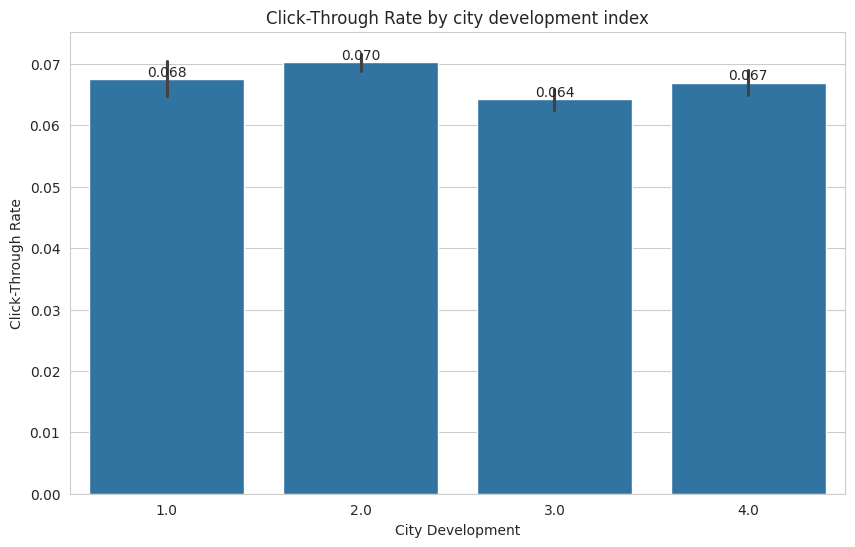

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.barplot(x='city_development_index',y='is_click',data=ctr)
sns.set_style('whitegrid')
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.title('Click-Through Rate by city development index')
plt.xlabel('City Development')
plt.ylabel('Click-Through Rate')
plt.show()

*There's no evidence that the city development index has an effect on CTR.*

***

## User Group ID

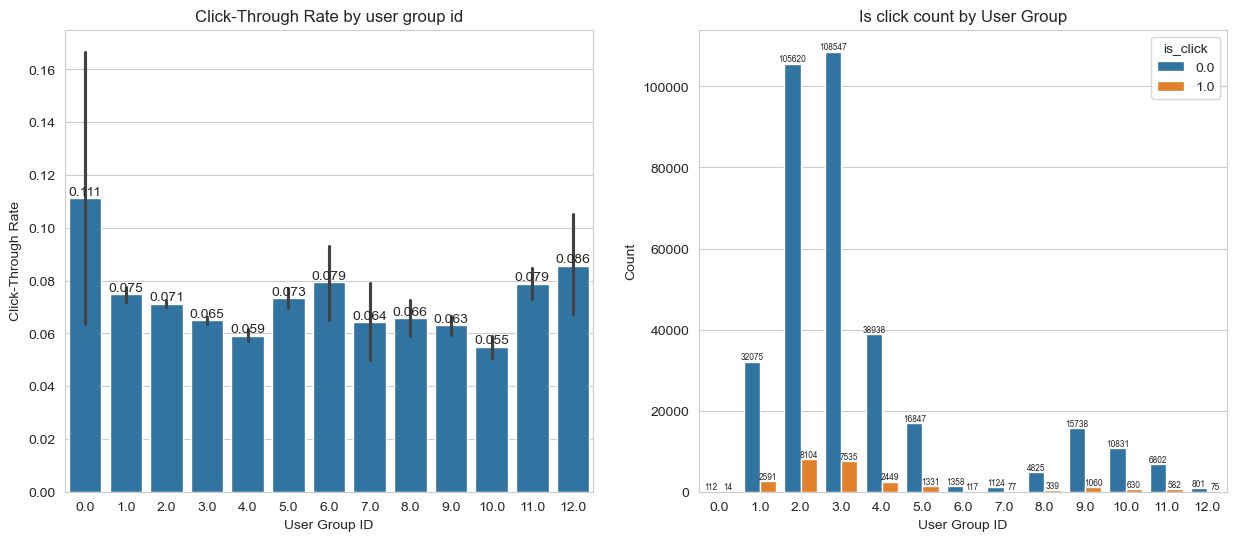

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='user_group_id', y='is_click', data=ctr, ax=ax[0])
ax[0].bar_label(ax[0].containers[0], fmt='%.3f')
ax[0].set_title('Click-Through Rate by user group id')  # Add the title
ax[0].set_xlabel('User Group ID')
ax[0].set_ylabel('Click-Through Rate')

sns.countplot(x='user_group_id', hue='is_click', data=ctr, ax=ax[1])
for container in ax[1].containers:
	ax[1].bar_label(container,fontsize=6)
ax[1].set_title('Is click count by User Group')  # Add the title
ax[1].set_xlabel('User Group ID')
ax[1].set_ylabel('Count')

plt.show() # this line displays the plot


### ANOVA Test

In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data_clean_us = ctr.dropna(subset=['is_click', 'user_group_id']).copy()
# Define the formula for ANOVA (dependent variable ~ independent variable)
data_clean_us['user_group_id'] = data_clean_us['user_group_id'].astype('category')
model = ols('is_click ~ user_group_id', data=data_clean_us).fit()
anova_table = anova_lm(model)

# Extract values for Partial Eta-Squared
ss_effect = anova_table.loc['user_group_id', 'sum_sq']
ss_total = ss_effect + anova_table.loc['Residual', 'sum_sq']
partial_eta_squared = ss_effect / ss_total

# Calculate Cohen's f²
cohens_f_squared = partial_eta_squared / (1 - partial_eta_squared)

# Display results
print("ANOVA Table:")
print(anova_table)
print("\nPartial Eta-Squared:", partial_eta_squared)
print("Cohen's f²:", cohens_f_squared)


ANOVA Table:
                     df        sum_sq   mean_sq          F        PR(>F)
user_group_id      12.0     11.501625  0.958469  15.218072  1.263511e-32
Residual       368509.0  23209.534492  0.062982        NaN           NaN

Partial Eta-Squared: 0.0004953106050111689
Cohen's f²: 0.0004955560591826596


**The effect is negligible so we can't say that there's a notable difference between user group IDs with respect to Clicks.**

***

## User depth

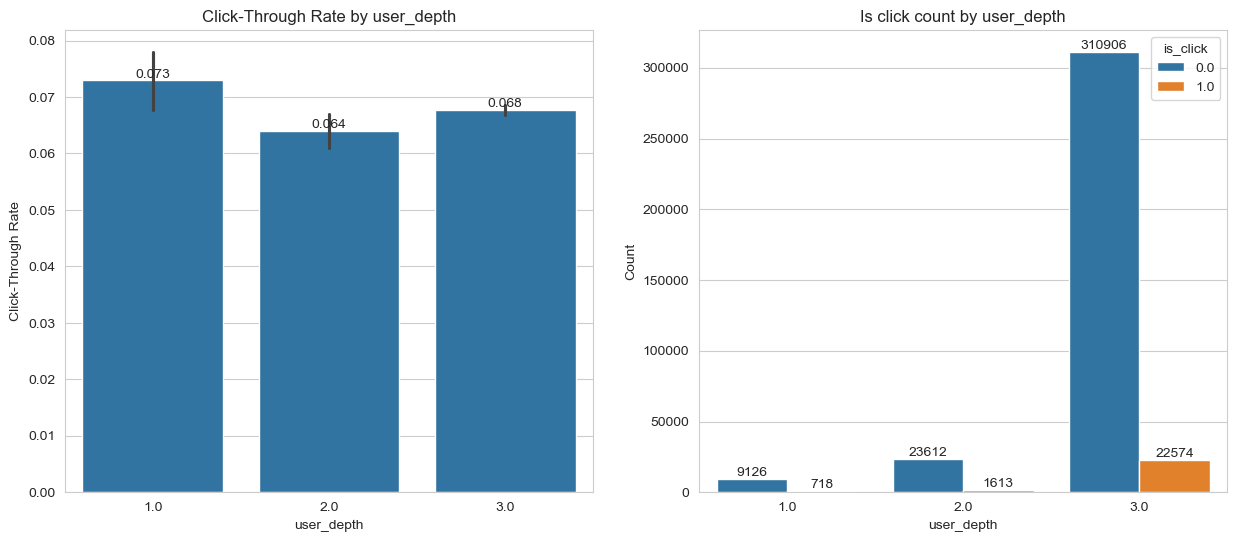

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='user_depth', y='is_click', data=ctr, ax=ax[0])
ax[0].bar_label(ax[0].containers[0], fmt='%.3f')
ax[0].set_title('Click-Through Rate by user_depth')  # Add the title
ax[0].set_xlabel('user_depth')
ax[0].set_ylabel('Click-Through Rate')

sns.countplot(x='user_depth', hue='is_click', data=ctr, ax=ax[1])
for container in ax[1].containers:
	ax[1].bar_label(container)
ax[1].set_title('Is click count by user_depth')  # Add the title
ax[1].set_xlabel('user_depth')
ax[1].set_ylabel('Count')

plt.show()


### ANOVA Test

In [41]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data_clean_di = ctr.dropna(subset=['is_click', 'user_depth']).copy()
# Define the formula for ANOVA (dependent variable ~ independent variable)
data_clean_di['user_depth'] = data_clean_di['user_depth'].astype('category')
model = ols('is_click ~ user_depth', data=data_clean_di).fit()
anova_table = anova_lm(model)

# Extract values for Partial Eta-Squared
ss_effect = anova_table.loc['user_depth', 'sum_sq']
ss_total = ss_effect + anova_table.loc['Residual', 'sum_sq']
partial_eta_squared = ss_effect / ss_total

# Calculate Cohen's f²
cohens_f_squared = partial_eta_squared / (1 - partial_eta_squared)

# Display results
print("ANOVA Table:")
print(anova_table)
print("\nPartial Eta-Squared:", partial_eta_squared)
print("Cohen's f²:", cohens_f_squared)


ANOVA Table:
                  df        sum_sq   mean_sq         F   PR(>F)
user_depth       2.0      0.620173  0.310087  4.921375  0.00729
Residual    368546.0  23221.404089  0.063008       NaN      NaN

Partial Eta-Squared: 2.6706262431907556e-05
Cohen's f²: 2.670697567540871e-05


**The effect size is really small so we can't say that the user depth has a significant effect on the Clicks.**  

***

### **What is the impact of ad and campaign attributes on CTR?**

C:\Users\maorb\AppData\Local\Temp\ipykernel_35572\2771185840.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
C:\Users\maorb\AppData\Local\Temp\ipykernel_35572\2771185840.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


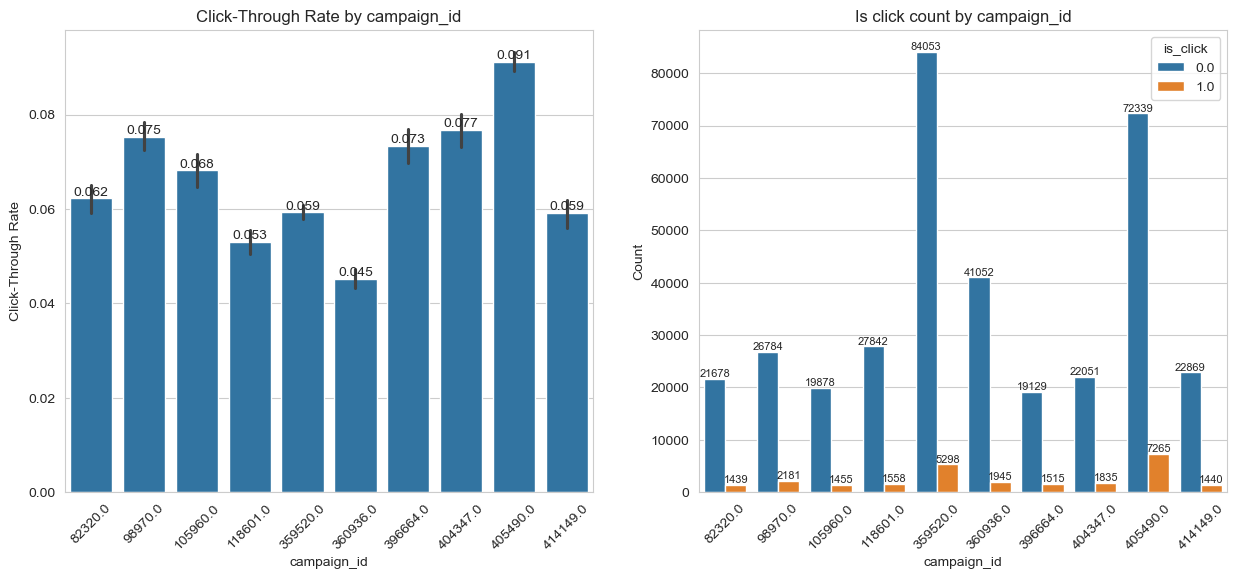

In [52]:
ctr.campaign_id.value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='campaign_id', y='is_click', data=ctr, ax=ax[0])
ax[0].bar_label(ax[0].containers[0], fmt='%.3f')
ax[0].set_title('Click-Through Rate by campaign_id')  # Add the title
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_xlabel('campaign_id')
ax[0].set_ylabel('Click-Through Rate')

sns.countplot(x='campaign_id', hue='is_click', data=ctr, ax=ax[1])
for container in ax[1].containers:
	ax[1].bar_label(container,fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_title('Is click count by campaign_id')  # Add the title
ax[1].set_xlabel('campaign_id')
ax[1].set_ylabel('Count')

plt.show() # this line displays the plot


In [54]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data_clean_di = ctr.dropna(subset=['is_click', 'campaign_id']).copy()
# Define the formula for ANOVA (dependent variable ~ independent variable)
data_clean_di['campaign_id'] = data_clean_di['campaign_id'].astype('category')
model = ols('is_click ~ campaign_id', data=data_clean_di).fit()
anova_table = anova_lm(model)

# Extract values for Partial Eta-Squared
ss_effect = anova_table.loc['campaign_id', 'sum_sq']
ss_total = ss_effect + anova_table.loc['Residual', 'sum_sq']
partial_eta_squared = ss_effect / ss_total

# Calculate Cohen's f²
cohens_f_squared = partial_eta_squared / (1 - partial_eta_squared)

# Display results
print("ANOVA Table:")
print(anova_table)
print("\nPartial Eta-Squared:", partial_eta_squared)
print("Cohen's f²:", cohens_f_squared)


ANOVA Table:
                   df        sum_sq   mean_sq           F         PR(>F)
campaign_id       9.0     85.329586  9.481065  150.953841  2.247717e-286
Residual     383596.0  24092.786567  0.062808         NaN            NaN

Partial Eta-Squared: 0.0035292074015987004
Cohen's f²: 0.0035417068195204445


**Here as well the effect size is small so we can't say that the ad and campaign attributes have a notable effect on the CTR.**

***

## Product and Gender vs Clicks

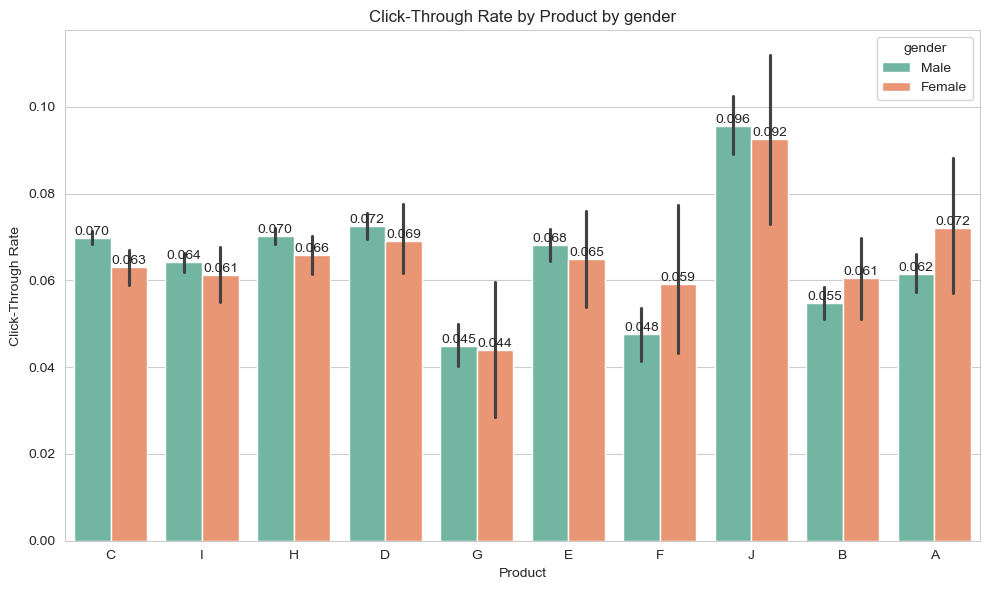

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.barplot(x='product',y='is_click',hue='gender',data=ctr, palette='Set2')
# sns.set_style('whitegrid')
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.bar_label(ax.containers[1], fmt='%.3f')
plt.title('Click-Through Rate by Product by gender')
plt.xlabel('Product')
plt.ylabel('Click-Through Rate')
plt.tight_layout()

### ANOVA Test

In [58]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Clean and preprocess the data
data_clean_di = ctr.dropna(subset=['is_click', 'product', 'gender']).copy()
data_clean_di['product'] = data_clean_di['product'].astype('category')

# Define and fit the ANOVA model
model = ols('is_click ~ gender * product', data=data_clean_di).fit()
anova_table = anova_lm(model)

# Extract values for Partial Eta-Squared
ss_gender = anova_table.loc['gender', 'sum_sq']
ss_user_depth = anova_table.loc['product', 'sum_sq']
ss_effect = ss_gender + ss_user_depth  # Combine sum of squares for all predictors
ss_total = ss_effect + anova_table.loc['Residual', 'sum_sq']
partial_eta_squared = ss_effect / ss_total

# Calculate Cohen's f²
cohens_f_squared = partial_eta_squared / (1 - partial_eta_squared)

# Display results
print("ANOVA Table:")
print(anova_table)
print("\nPartial Eta-Squared:", partial_eta_squared)
print("Cohen's f²:", cohens_f_squared)


ANOVA Table:
                      df        sum_sq   mean_sq          F        PR(>F)
gender               1.0      0.484207  0.484207   7.687940  5.559384e-03
product              9.0     16.553031  1.839226  29.202062  2.042512e-51
gender:product       9.0      0.706798  0.078533   1.246899  2.607964e-01
Residual        367852.0  23168.324310  0.062983        NaN           NaN

Partial Eta-Squared: 0.0007348273932995205
Cohen's f²: 0.0007353677616749486


**The effect size is small so we can't say that the gender and product attributes have a significant effect on the CTR, morover we can see that there's no evidence for interaction between product and gender attributes with respect to CTR.**

***

C:\Users\maorb\AppData\Local\Temp\ipykernel_28392\2749952538.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
C:\Users\maorb\AppData\Local\Temp\ipykernel_28392\2749952538.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


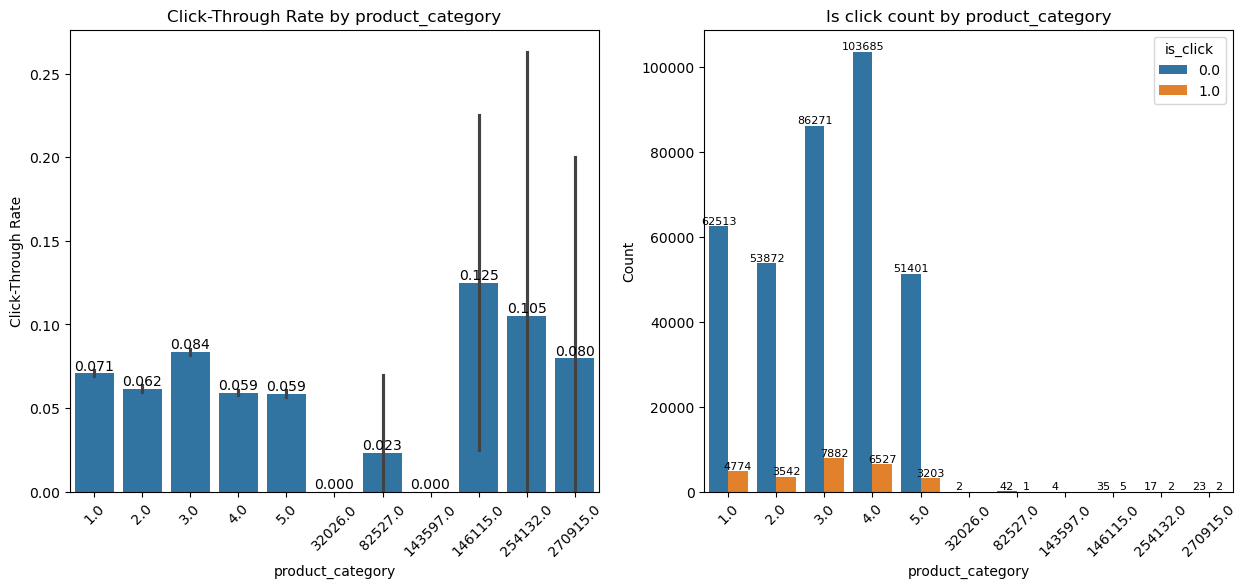

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
ctr['product_category'] = ctr['product_category_1'].fillna(ctr['product_category_2'])

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='product_category', y='is_click', data=ctr, ax=ax[0])
ax[0].bar_label(ax[0].containers[0], fmt='%.3f')
ax[0].set_title('Click-Through Rate by product_category')  # Add the title
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_xlabel('product_category')
ax[0].set_ylabel('Click-Through Rate')

sns.countplot(x='product_category', hue='is_click', data=ctr, ax=ax[1])
for container in ax[1].containers:
	ax[1].bar_label(container,fontsize=8)
ax[1].set_title('Is click count by product_category')  # Add the title
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_xlabel('product_category')
ax[1].set_ylabel('Count')

plt.show()

*We have very few values on product category 2 to impute missing values in product category 1.*

In [61]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data_clean_cat1 = ctr.dropna(subset=['is_click', 'product_category']).copy()
data_clean_cat1['product_category'] = data_clean_cat1['product_category'].astype('category')
# Define the formula for ANOVA (dependent variable ~ independent variable)
model = ols('is_click ~ product_category', data=data_clean_cat1).fit()

# Perform ANOVA
anova_table = anova_lm(model)

ss_effect = anova_table.loc['product_category', 'sum_sq']
ss_total = ss_effect + anova_table.loc['Residual', 'sum_sq']
partial_eta_squared = ss_effect / ss_total

# Calculate Cohen's f²
cohens_f_squared = partial_eta_squared / (1 - partial_eta_squared)

# Display results
print("ANOVA Table:")
print(anova_table)
print("\nPartial Eta-Squared:", partial_eta_squared)
print("Cohen's f²:", cohens_f_squared)




ANOVA Table:
                        df        sum_sq   mean_sq          F         PR(>F)
product_category      10.0     39.584469  3.958447  62.919434  1.251938e-128
Residual          383792.0  24145.485397  0.062913        NaN            NaN

Partial Eta-Squared: 0.0016367316512321153
Cohen's f²: 0.0016394149335433484


**Again, we see very small effect size so we can't say that the product category  has a meaningful effect on the target variable.**

***

### **How does temporal and session behavior affect CTR?**

Analyze the distribution of clicks across time (datetime) to identify trends or peak engagement periods.
Investigate session-level attributes (user_depth) to see if higher engagement levels correlate with increased CTR.


## Campaign ID vs Cllicks over time

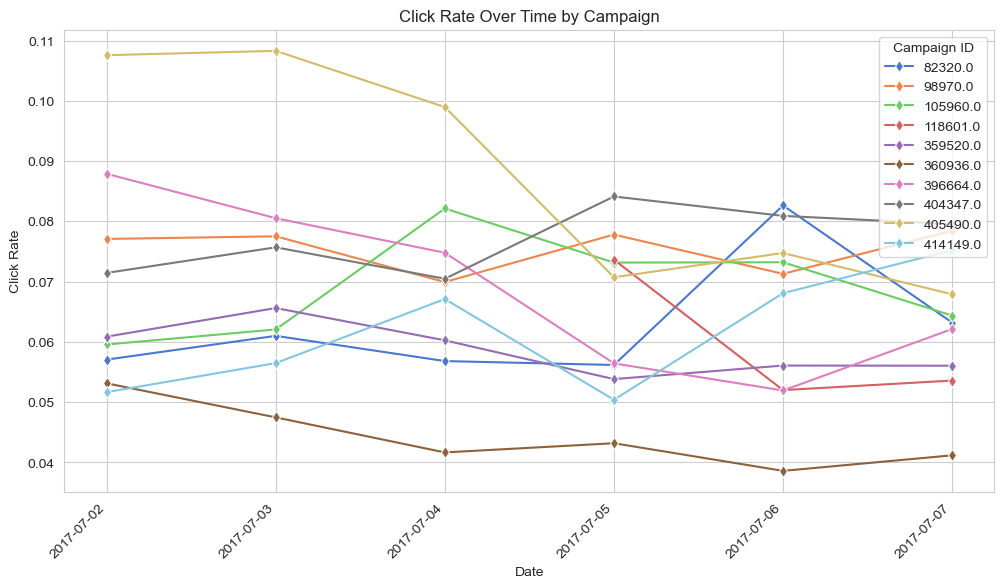

In [71]:
# Assuming you have a 'timestamp' column in your data
ctr['DateTime'] = pd.to_datetime(ctr['DateTime']) # Convert to datetime if needed
ctr['date'] = ctr['DateTime'].dt.date # Extract date from timestamp

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='is_click', hue='campaign_id', data=ctr, palette='muted',errorbar=None,marker = 'd')
plt.xlabel('Date')
plt.ylabel('Click Rate')
plt.title('Click Rate Over Time by Campaign')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Campaign ID', loc='upper right')
plt.show()

**We can't see conclusive evidence about the trend of the CTR over time with respect to campaign ID.**

***

## Product vs Clicks over time

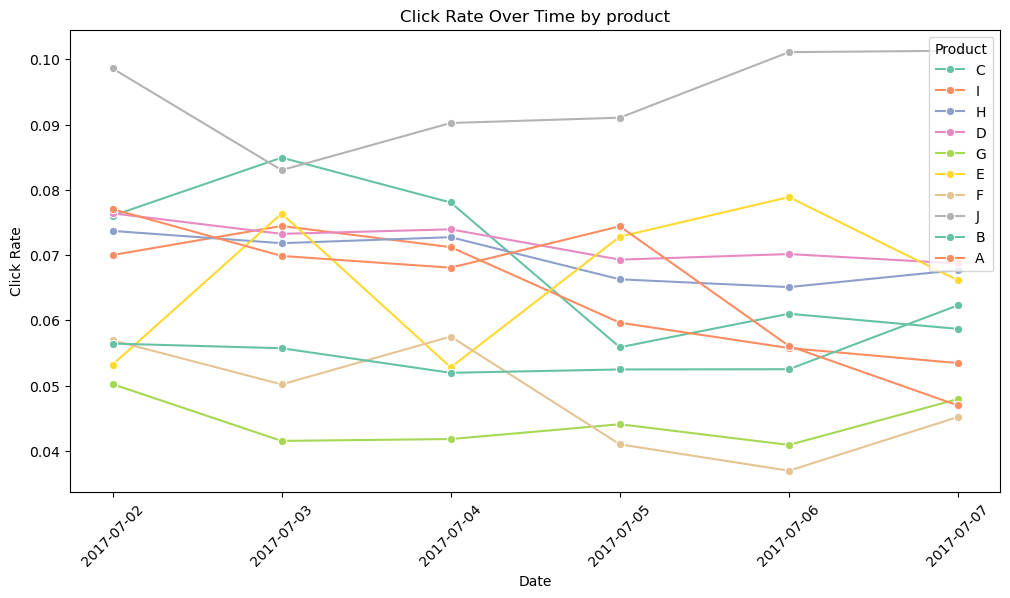

In [13]:
ctr['DateTime'] = pd.to_datetime(ctr['DateTime']) # Convert to datetime if needed
ctr['date'] = ctr['DateTime'].dt.date # Extract date from timestamp

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='is_click', hue='product', data=ctr, palette='Set2',marker='o',errorbar=None)
plt.xlabel('Date')
plt.ylabel('Click Rate')
plt.title('Click Rate Over Time by product')
plt.xticks(rotation=45)
plt.legend(title='Product', loc='upper right')
plt.show()

**We can't see conclusive evidence about the trend of the CTR over time with respect to specific product.**

***

## Hour vs Clicks

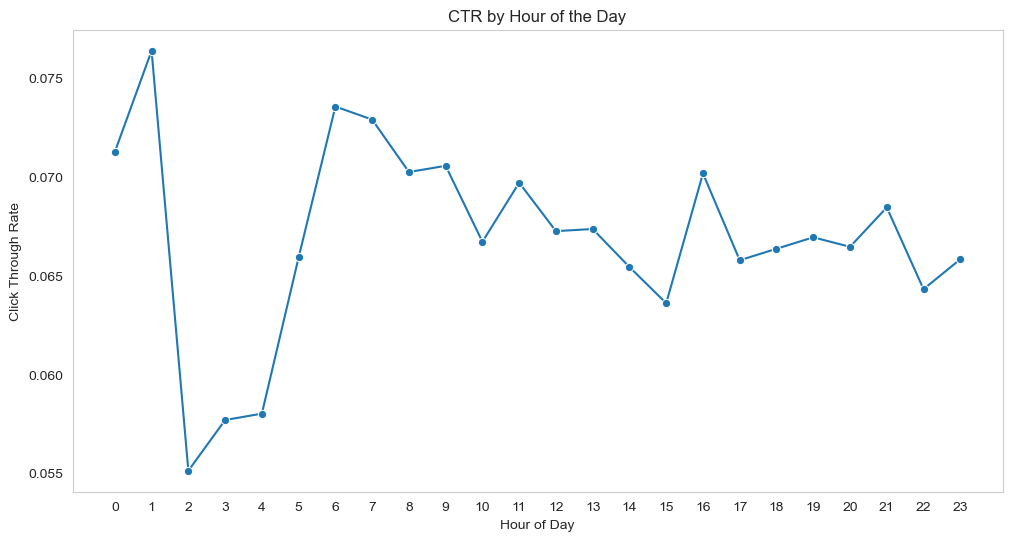

In [73]:
# 2. Analyze how temporal behavior affects CTR
df = ctr.copy()
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract hour from datetime
df['hour'] = df['DateTime'].dt.hour

# Calculate CTR by hour of the day
ctr_by_hour = df.groupby('hour')['is_click'].mean().reset_index()

# Plot CTR by Hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='is_click', data=ctr_by_hour, marker='o')
plt.title('CTR by Hour of the Day')
plt.ylabel('Click Through Rate')
plt.xlabel('Hour of Day')
plt.xticks(range(24))
plt.grid()
plt.show()

**It seems that the CTR is the lowest at sleep hours**

### Anova test

In [74]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data_clean_cat1 = df.dropna(subset=['is_click', 'hour'])
# Define the formula for ANOVA (dependent variable ~ independent variable)
model = ols('is_click ~ hour', data=data_clean_cat1).fit()

# Perform ANOVA
anova_table = anova_lm(model)

ss_effect = anova_table.loc['hour', 'sum_sq']
ss_total = ss_effect + anova_table.loc['Residual', 'sum_sq']
partial_eta_squared = ss_effect / ss_total

# Calculate Cohen's f²
cohens_f_squared = partial_eta_squared / (1 - partial_eta_squared)

# Display results
print("ANOVA Table:")
print(anova_table)
print("\nPartial Eta-Squared:", partial_eta_squared)
print("Cohen's f²:", cohens_f_squared)




ANOVA Table:
                df        sum_sq   mean_sq         F   PR(>F)
hour           1.0      0.190785  0.190785  3.027796  0.08185
Residual  383627.0  24172.841493  0.063011       NaN      NaN

Partial Eta-Squared: 7.892489558920038e-06
Cohen's f²: 7.892551850803114e-06


**No Evidence of significant effect of the hour on the CTR over time.**

***

## Day vs Clicks

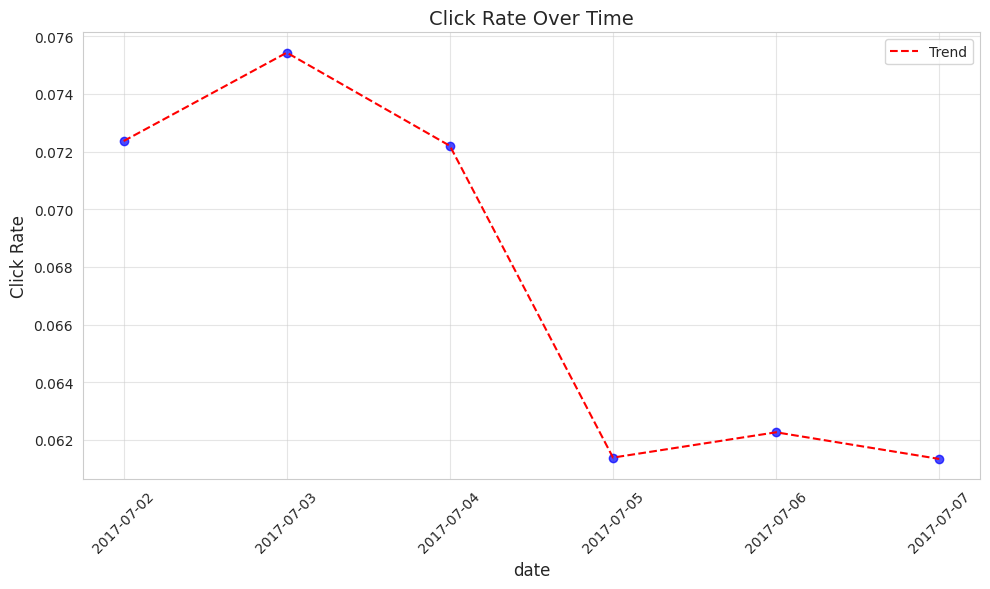

In [ ]:
# Calculate click rate by date
click_rate_by_date = ctr.groupby("date")["is_click"].mean().reset_index()

# Scatter plot for click rate over time
plt.figure(figsize=(10, 6))
plt.scatter(click_rate_by_date["date"], click_rate_by_date["is_click"], color="blue", alpha=0.7)
plt.plot(click_rate_by_date["date"], click_rate_by_date["is_click"], color="red", linestyle="--", label="Trend")

# Add labels, title, and grid
plt.title("Click Rate Over Time", fontsize=14)
plt.xlabel("date", fontsize=12)
plt.ylabel("Click Rate", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

**We can see that there are less clicks from wednesday to friday, according to the data.**

### Anova test

In [77]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

data_clean_cat1 = ctr.dropna(subset=['is_click', 'date']).copy()
data_clean_cat1['date'] = data_clean_cat1['date'].astype('category')
# Define the formula for ANOVA (dependent variable ~ independent variable)
model = ols('is_click ~ date', data=data_clean_cat1).fit()

# Perform ANOVA
anova_table = anova_lm(model)

ss_effect = anova_table.loc['date', 'sum_sq']
ss_total = ss_effect + anova_table.loc['Residual', 'sum_sq']
partial_eta_squared = ss_effect / ss_total

# Calculate Cohen's f²
cohens_f_squared = partial_eta_squared / (1 - partial_eta_squared)

# Display results
print("ANOVA Table:")
print(anova_table)
print("\nPartial Eta-Squared:", partial_eta_squared)
print("Cohen's f²:", cohens_f_squared)




ANOVA Table:
                df        sum_sq   mean_sq          F        PR(>F)
date           5.0     13.630367  2.726073  43.286852  8.883831e-45
Residual  383623.0  24159.401911  0.062977        NaN           NaN

Partial Eta-Squared: 0.0005638666660675736
Cohen's f²: 0.0005641847910647573


***

## Wildcard- Var_1

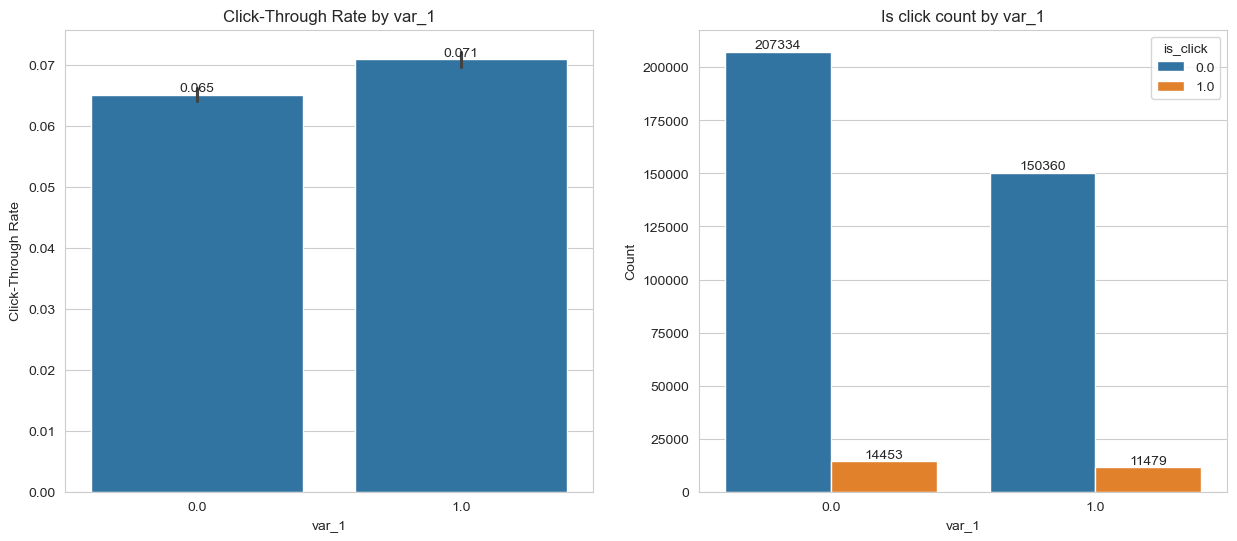

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='var_1', y='is_click', data=ctr, ax=ax[0])
ax[0].bar_label(ax[0].containers[0], fmt='%.3f')
ax[0].set_title('Click-Through Rate by var_1')  # Add the title
ax[0].set_xlabel('var_1')
ax[0].set_ylabel('Click-Through Rate')

sns.countplot(x='var_1', hue='is_click', data=ctr, ax=ax[1])
for container in ax[1].containers:
	ax[1].bar_label(container)
ax[1].set_title('Is click count by var_1')  # Add the title
ax[1].set_xlabel('var_1')
ax[1].set_ylabel('Count')

plt.show()

In [93]:
contingency_table = pd.crosstab(ctr['var_1'], ctr['is_click'])   
chi2, p, dof, expected = chi2_contingency(contingency_table)
phi_coefficient = np.sqrt(chi2 / len(ctr))
print(f'Chi2: {chi2}')
print(f'p-value: {p}')
print(f'Phi Coefficient: {phi_coefficient}')
print(f'Degree of Freedom: {dof}')

Chi2: 49.20153775617614
p-value: 2.3096957181704137e-12
Phi Coefficient: 0.011244070680687604
Degree of Freedom: 1


**For the Var_1 attribute, we can see that the effect size is small but it's not negligible, generally if the effect size is larger than 0.1 we can say that the effect is significant, and our pvalue is small as expected because we have a large number of samples.**

## Cramer's V Correlation

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Apply Cramér's V to all categorical variable pairs
categorical_cols = ['age_level', 'user_depth', 'user_group_id','product','product_category','campaign_id','var_1','webpage_id','gender','city_development_index','is_click']
correlation_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1  # Diagonal is always 1
        else:
            correlation_matrix.loc[col1, col2] = cramers_v(ctr[col1], ctr[col2])



Text(0.5, 1.0, "Cramér's V Correlation Matrix")

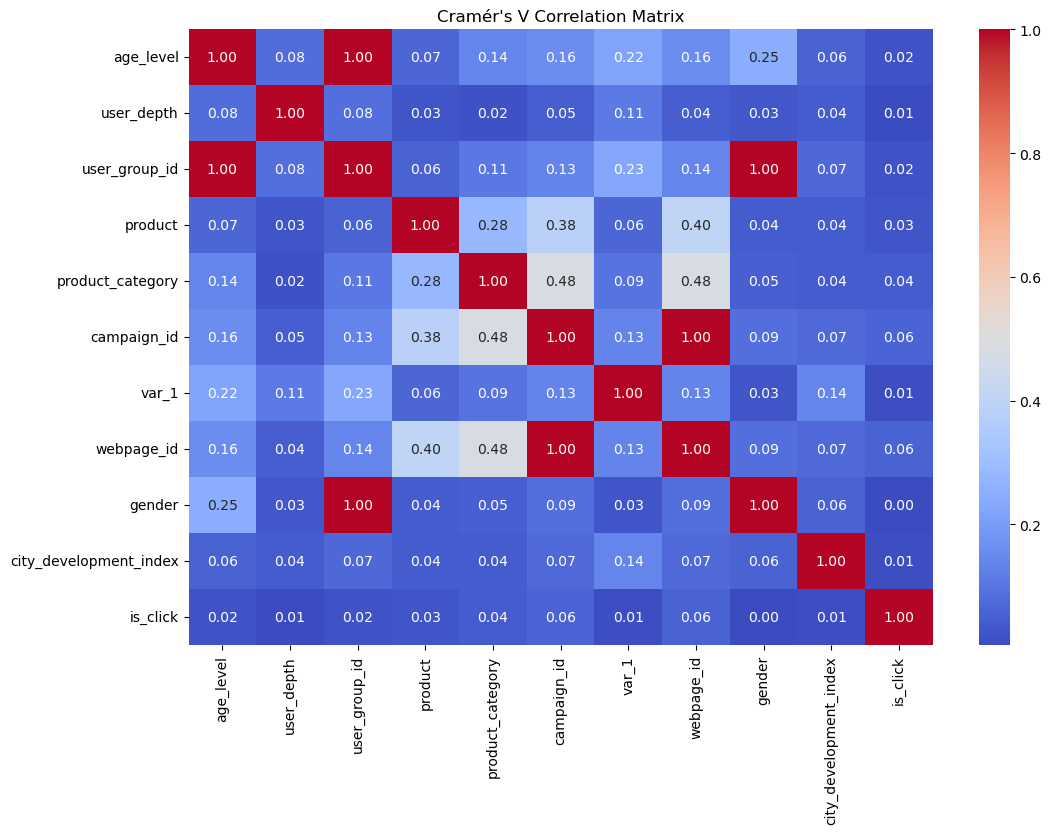

In [21]:
# Convert the correlation matrix to numeric values
correlation_matrix1 = correlation_matrix.copy()
correlation_matrix1 = correlation_matrix1.apply(pd.to_numeric)
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramér's V Correlation Matrix")


1. We have **Perfect** Association between age_level and user_group_id, gender and user_group_id, webpage_id and campaign_id. We can understand from it that the user_group_id is a combination of age_level and gender and webpage_id and campaign_id might be redundant. Following this, we can drop one of the columns in each pair when modeling, or perform aggregation on them. 

2. We have higher association between product and product category with relation to webpage_id and campaign_id. following this, we can drop one of the columns in each pair when modeling, or perform aggregation on them.


#### Sanity check:

In [19]:
df_no_null = ctr.dropna(subset=['age_level', 'user_group_id'])
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_no_null['age_level'], df_no_null['user_group_id']))
chi_coefficient = np.sqrt(chi2 / len(df_no_null))
print(f'Chi2: {chi2}')
print(f'p-value: {p}')
print(f'Degree of Freedom: {dof}')
print(f'Chi Coefficient: {chi_coefficient}')

Chi2: 2211120.0
p-value: 0.0
Degree of Freedom: 72
Chi Coefficient: 2.449489742783178


In [20]:
df_nonull = ctr.dropna(subset=['gender', 'user_group_id'])
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_nonull['gender'], df_nonull['user_group_id']))
chi_coefficient = np.sqrt(chi2 / len(df_nonull))
print(f'Chi2: {chi2}')
print(f'p-value: {p}')
print(f'Degree of Freedom: {dof}')
print(f'Chi Coefficient: {chi_coefficient}')

Chi2: 368322.10494860954
p-value: 0.0
Degree of Freedom: 12
Chi Coefficient: 0.9997436721508656


We can see incredibly high effect sizes for these associations and really small p-value.

## **We have the following conclusions:**

1. we can say that the Var_1 attribute has a significant effect on the CTR.

2. Hourly Clicks: The CTR is the lowest at sleep hours, between 2-6 AM. When we model the data, we can use this information to create a feature that represents the time of the day.

3. Day Clicks: We can see that there are less clicks from Wednesday to Friday, according to the data. This information can be used to create a feature that represents the day of the week.


4. Feature Association: We have perfect association between some features and relatively higher association between others. We can drop one of the columns in each pair when modeling, or perform aggregation on them.

5. We did not find robust evidence that user attributes, ad and campaign attributes, or temporal and session behavior significantly affect CTR. However, we can use the insights from the EDA to engineer features that may have a stronger impact on the target variable.